# KRISTIAN ARBEJDER IKKE NU!

# ROLF ER FÆRDIG NU!

**Literature**



**Learning objectives:**
- Combining datasets: join, append
- Replacing missing values
- Using split-apply-combine
- Manipulating strings
- Using regular expression to find patterns in text
- Using functions when manipulating variables
- Easing recoding with for loops
- Using conditionals in recoding
- Being familiar with various recoding functions in pandas

**Evidence/evaluation types:**
- Able to combine datasets
- Knowledge check: type of join is needed for a specific task?
- Knowledge check: what are missing values?
- Knowledge check: will a certain operation create missing values?
- Able to replace missing with a certain value
- Able to replace missing using a function
- Knowledge check: when does it make sense to do split-apply-combine?
- Able to calculate summary statistics on a group-basis
- Knowledge check: what is a string?
- Able to perform simple look-ups with regular expression
- Able to define a function that can be used in recoding (using map)
- Able to identify when a task can be automated using a for loop
- Able to use the same function to recode several variables
- Able to use pandas functions for recoding
- Knowledge check: how a certain function for recoding works

# Kombinering af datasæt i Python

I nogle tilfælde bliver vi nødt til at tilføje data til vores eksisterende datasæt. Der findes mange forskellige metoder til at tilføje data men de to primære er concatenate (også kaldet append) or merge. Først skal vi kigge lidt nærmere på concatenate.

# Tilføj rækker (concatenate)

Concatenate bruger vi når vi har de samme variable men ønsker at tilføje flere observationer til dem.

Concatenate ser sådan her ud:

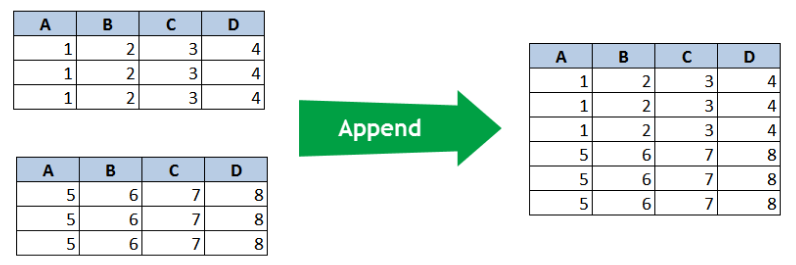

I praksis betyder det, at vi er afhængig af, at vi har de samme variable men flere observationer af disse variable.

Hvis vi har "for mange" variable i det ene eller andet datasæt, bliver de missing (eller NAN) i det datasæt hvor variablene ikke er til stede.

## Eksempel på concatenate

Concatenate i Python er rimelig ligetil, men før vi gør noget som helst, skal vi importere de pakker vi har brug for. 

In [61]:
import pandas as pd # Pandas pakken til datamanipulation og analyse
import numpy as np # "Fancy" videnskabelig computation

#Og så gør vi lige noget fnidder-fnadder der er ligemeget:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Når vi har vores pakker er det bare at losse data ind. I stedet for, som vi normalt gør, at have én dataframe kan vi nu udnytte, at Python er helt ok med, at vi har lige så mange dataframes som computerens (eller serverens i dette tilfælde) kan holde til:

In [62]:
df1 = pd.read_csv("https://github.com/CALDISS-AAU/workshop_python-data-analysis/raw/master/datasets/ESS2014DK_sub1.csv")
df2 = pd.read_csv("https://github.com/CALDISS-AAU/workshop_python-data-analysis/raw/master/datasets/ESS2014DK_sub2.csv")

Lad os først tjekke første dataframe (df1):

In [63]:
df1.head()

,idno,ppltrst,happy,health,cgtsday,alcfreq,height,weight,gndr,yrbrn
0,921490,4,Extremely happy,Very good,NaN,Never,167.0,62.0,Female,1965.0
1,938348,Most people can be trusted,7,Good,NaN,Several times a week,168.0,70.0,Female,1973.0
2,939019,5,NaN,Good,3.0,Once a week,182.0,90.0,Male,1980.0
3,924985,8,9,Very good,NaN,Once a week,NaN,85.0,Male,1946.0
4,925410,4,NaN,Bad,NaN,Several times a week,156.0,60.0,Female,1969.0


Og den anden:

In [64]:
df2.head()

,idno,ppltrst,happy,health,cgtsday,alcfreq,height,weight,gndr,yrbrn
0,921018,6,9,Very good,10.0,2-3 times a month,178.0,64.0,Male,1990.0
1,921026,8,8,Very good,NaN,Several times a week,172.0,64.0,Female,1948.0
2,921084,5,8,Very good,NaN,Every day,175.0,80.0,Male,NaN
3,921165,8,Extremely happy,Good,NaN,Once a week,167.0,78.0,Female,1965.0
4,921220,8,8,Fair,NaN,Every day,178.0,80.0,NaN,1949.0


Ved at lave en hurtig sammenligning kan vi se, at vi har samme datasæt men at respondenterne varierer (idno). Vi kunne pludselig tænke os, at det stoppede med at være to forskellige frames men i stedet én samlet. Med pandas er det heldigvis rimelig ligetil:

In [65]:
conc_data = pd.concat([df1, df2])

Mere er der ikke til det. Vi kan lige hurtigt sammenligne hvordan data så ud før:

In [66]:
print("Info on first dataset:")
df1.info(verbose=False)
print("")
print("Info on second dataset:")
df2.info(verbose=False)

Info on first dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Columns: 10 entries, idno to yrbrn
dtypes: float64(4), int64(1), object(5)
memory usage: 58.8+ KB

Info on second dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Columns: 10 entries, idno to yrbrn
dtypes: float64(4), int64(1), object(5)
memory usage: 58.8+ KB


For så derefter lige at sikre os, at vi har dobbelt op ved at plusse de to værdier i RangeIndex for df1 og df2 og sammenligne med RangeIndex for conc_data

In [67]:
conc_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 750
Columns: 10 entries, idno to yrbrn
dtypes: float64(4), int64(1), object(5)
memory usage: 129.1+ KB


Vi kan også, på en ret kluntet måde, hvis vi virkelig ikke kan overskue at plusse de to værdier for antal entries (rækker) fra df1 og df2 med conc_data, tjekke det automatisk

In [68]:
count_df1=len(df1)
count_df2=len(df2)
total_dfs=count_df1+count_df2
count_conc_data=len(conc_data)
print("The number of observations in df1 is", count_df1, "and", count_df2, "in df2.")
print("The total count in conc_data is", count_conc_data, "and the total of df1 and df2 is", total_dfs )
print("It is", total_dfs==count_conc_data, "that the concatenation worked as we hoped")

The number of observations in df1 is 751 and 751 in df2.
The total count in conc_data is 1502 and the total of df1 and df2 is 1502
It is True that the concatenation worked as we hoped


Vi er glade for vores concatenation - job well done

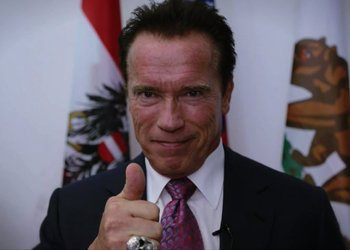

# Joins / Merge

Hvad er et join (som jeg herefter kalder merge fordi.... det gør jeg bare)?

Et merge minder om concatenate i den forstand, at vi tilføjer data til et eksisterende datasæt. I dette tilfælde vil vi dog ikke putte flere observationer på eksisterende variable, men i stedet tilføje flere variable til eksisterende observationer. Det ser sådan her ud:

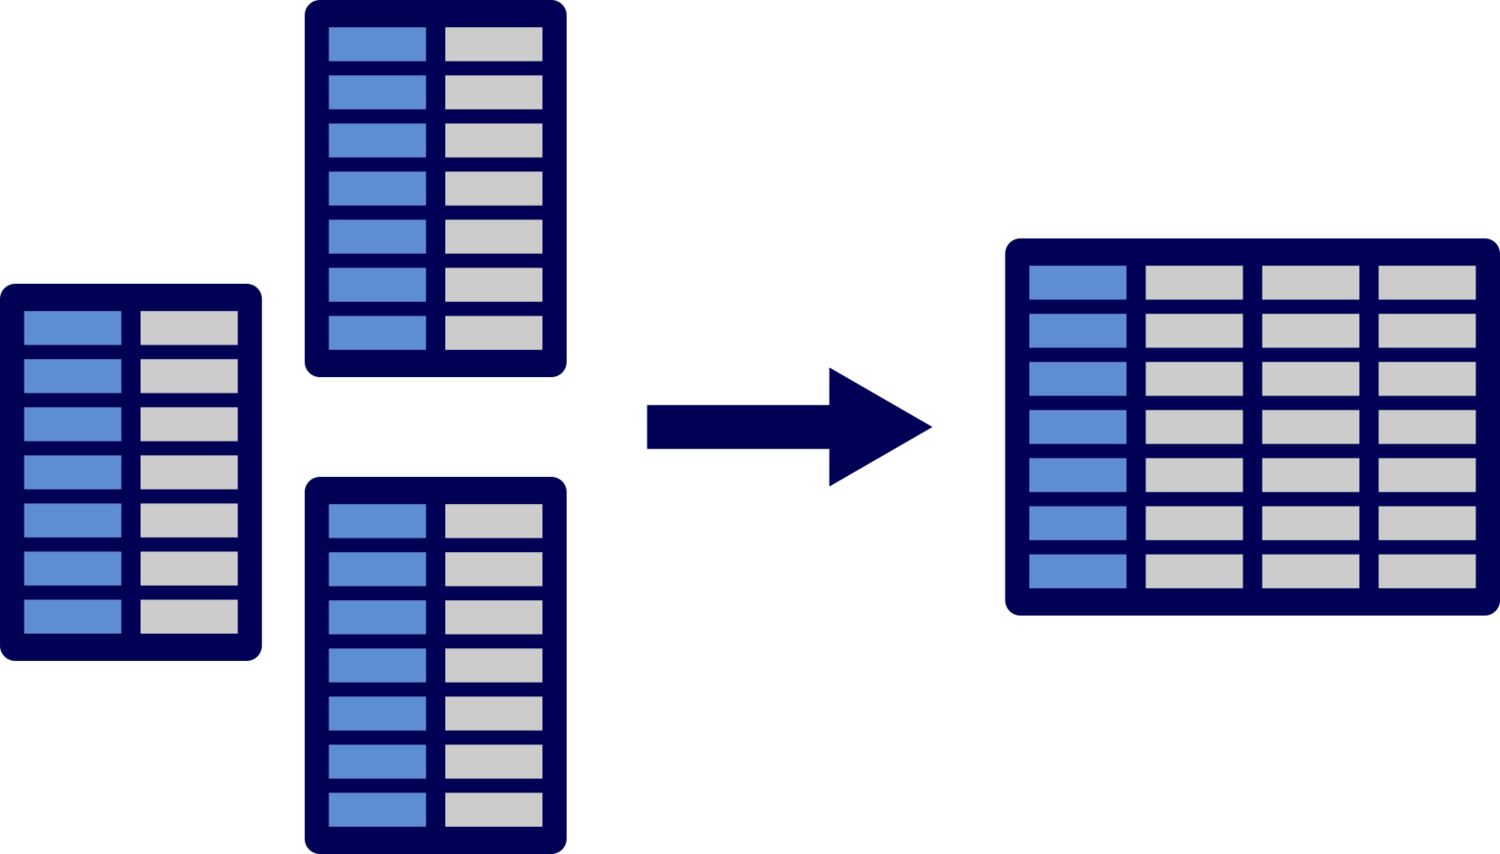

Når vi ved det, lad os så inspicere vores nye data. Vi laver først vores dataframes:

In [69]:
df1m=pd.read_csv("ESS2014DK_sub1m.csv")
df2m=pd.read_csv("ESS2014DK_sub2m.csv")

In [70]:
df1m.head()
df1m.info(verbose=False)

,idno,ppltrst,happy,health,cgtsday,alcfreq
0,921490,4,Extremely happy,Very good,NaN,Never
1,938348,Most people can be trusted,7,Good,NaN,Several times a week
2,939019,5,NaN,Good,3.0,Once a week
3,924985,8,9,Very good,NaN,Once a week
4,925410,4,NaN,Bad,NaN,Several times a week


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Columns: 6 entries, idno to alcfreq
dtypes: float64(1), int64(1), object(4)
memory usage: 70.5+ KB


In [71]:
df2m.head()
df2m.info(verbose=False)

,idno,height,weight,gndr,yrbrn
0,921490,167.0,62.0,Female,1965.0
1,938348,168.0,70.0,Female,1973.0
2,939019,182.0,90.0,Male,1980.0
3,924985,NaN,85.0,Male,1946.0
4,925410,156.0,60.0,Female,1969.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Columns: 5 entries, idno to yrbrn
dtypes: float64(3), int64(1), object(1)
memory usage: 58.8+ KB


Nu har vi data. Det vi smadder gerne vil nu er, at undersøge hvad det er for noget data vi har til rådighed og om der er en **nøgle**

Nøgler er det der indikerer, at to ting hører sammen. Som tidligere, så bruger vi ESS, men nu er der en eller anden der har tævet data over i to på langs. Nogle variable er i df1m mens andre pludselig ligger i df2m. Vi vil smadder gerne have dem til at bo som ét datasæt og ikke som to.

Python/Pandas kan ikke "gætte" hvad der hører sammen og vi kan ikke bare håbe, at den nok selv regner det ud. I stedet kan vi håbe på, at der er en **nøgle**.

I vores tilfælde er vi heldige; vi har et id-nummer - `idno` - der fortæller os hvem der hører sammen med hvem.

Før vi begynder at lege med reelt set at smide tingene sammen i en pærevælding skal vi nødt til at kende forskel på de forskellige merges man kan lave:

* Left outer
* Right outer
* Inner
* Outer

For at forstå hvad præcis de 4 "metoder" gør når vi merger er det nemmest at se, hvad resultatet bliver for dem visuelt... i hvert fald de sidste to. 

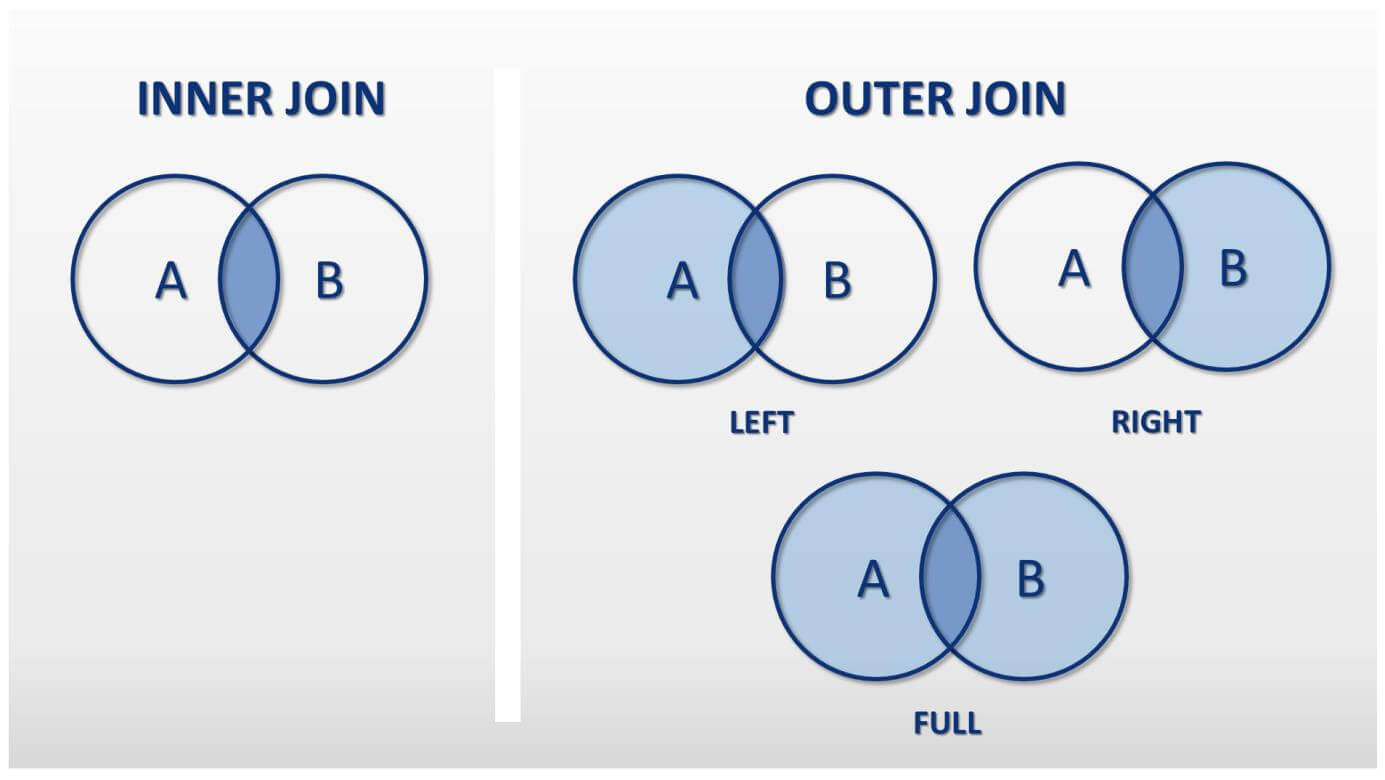

Et left join (den dataframe der er til venstre - altså først) er den data bliver proppet på. Hvis der forekommer 100 værdier i den venstre dataframe og 200 i den anden kigger den udelukkende efter nøglerne i den første dataframe og ignorerer dem i den anden dataframe der er "for mange" og smider væk men kun dem der er for mange i det højre. Er der nogen i det venstre der ikke eksisterer i det højre bliver de bibeholdt. Den prioriterer ligeledes udelukkende nye variable i det højre datasæt og alt der der allerede eksisterer i den venstre dataframe bliver smidt væk fra den højre.

Sjovt nok er right merge det samme som left bare den anden vej rundt....

Til gengæld er der voldsom stor forskel på inner og outer joins.

Et inner join tager udelukkende ting med, hvor nøglerne eksisterer i begge datasæt. Alt andet bliver smidt væk og man har et "rent" datasæt.

Et outer join tager alt med. Dem der eksisterer i det venstre kun, i højre kun og fælles. I de tilfælde hvor de mangler i enten venstre eller højre bliver der hvor de mangler fyldt med missing.



Hvad er kommandoen? Easy-peasy; `pd.merge()`

Hvad er `options`? Mange...

De primære muligheder vi har er:

* on
* left_on / right_on
* how
* validate

Hvis **Nøglen** har samme navn i både df1 og df2 kan vi nøges med at specificere `on`, men hvis nøglen hedder noget forskelligt (f.eks. idno og idnum) kan vi bruge `left_on` til nøglen i første df og `right_on`til det andet.

`How` siger noget om, hvilken af de muligheder vi har (left, right, inner, outer). Vi kan derfor specificere metoden der.

`validate` er lidt anderledes. Validate kan enten tage funktionen `one_to_one`, `many_to_one` eller `one_to_many`.

Forskellen på metoderne er hvad vi vil acceptere vores merge ender med at spytte ud. One to one accepterer kun, hvis der er én observation for hver nøgle i hvert datasæt. Det betyder, at hvis respondenten går igen i enten det ene eller det andet. Der må, med andre ord, kun være én nøgle for hver respondent i hver df. Alt andet resulterer i en `error`.

De to andre er giver lidt mere sig selv; many to one indikerer, at der gerne må være mange nøgler til stede i df1 og at værdierne er unikke i df2. Hver respondent får derfor samme værdi fra df2 proppet på df1. Modsat, hvis der kun er én observation per id i df1 men mange i df2 kan vi specificere one to many i stedet.

Kommandoen ser sådan her ud:

In [72]:
df_merge = pd.merge(df1m, df2m, on='idno', how='outer', validate="one_to_one")
df1m.head()
df2m.head()
df_merge.head()

,idno,ppltrst,happy,health,cgtsday,alcfreq
0,921490,4,Extremely happy,Very good,NaN,Never
1,938348,Most people can be trusted,7,Good,NaN,Several times a week
2,939019,5,NaN,Good,3.0,Once a week
3,924985,8,9,Very good,NaN,Once a week
4,925410,4,NaN,Bad,NaN,Several times a week


,idno,height,weight,gndr,yrbrn
0,921490,167.0,62.0,Female,1965.0
1,938348,168.0,70.0,Female,1973.0
2,939019,182.0,90.0,Male,1980.0
3,924985,NaN,85.0,Male,1946.0
4,925410,156.0,60.0,Female,1969.0


,idno,ppltrst,happy,health,cgtsday,alcfreq,height,weight,gndr,yrbrn
0,921490,4,Extremely happy,Very good,NaN,Never,167.0,62.0,Female,1965.0
1,938348,Most people can be trusted,7,Good,NaN,Several times a week,168.0,70.0,Female,1973.0
2,939019,5,NaN,Good,3.0,Once a week,182.0,90.0,Male,1980.0
3,924985,8,9,Very good,NaN,Once a week,NaN,85.0,Male,1946.0
4,925410,4,NaN,Bad,NaN,Several times a week,156.0,60.0,Female,1969.0


# Merge/Join med Pandas i Python

- Øvelse: vi har fået til opgave at lave nogle analyser for et sygehus der har testet medicin for blodtrykket. Vi har været ret uheldige med vores medhjælpere og de har delt arbejdet ret akavet mellem sig så i stedet for én samlet datafil har vi nu 4. Før-målingen hedder bp_after_1 og bp_after_2 (de har ikke kun splittet før- og eftermålingerne op men også taget halvdelen af respondenterne hver især). I skal forsøge at finde hoved og hale i det ved at få data stykket sammen rigtigt. Noget skal concatenates på og andet skal merges sammen. Der er ikke en rigtig eller forkert rækkefølge.

- Husk; er der en nøgle?

- Bemærk, der er ikke en måde vi kan adskille før og efter på. Måske vi kunne overveje at lave en variabel i vores dataframe sådan at vi, når alt er sat sammen, kan kende forskel på før medicin og efter medicin.

# Håndtering af missing værdier

In [73]:
df = conc_data.copy()

Missingværdier håndteres overordnet på to måder:

- Rækker med missingværdier fjernes ("listwise deletion"
- Værdier "imputeres"; dvs. erstattes med en bestemt værdi.

Der findes et hav af avancerede teknikker til at imputere. I denne session gennemgås, hvordan missing fjernes eller erstattes med enkelte værdier.

## Hvor er der missing?

Metoderne `isnull()` og `notnull()` bruges til at tjekke, om hhv. værdier er missing eller værdier ikke er missing.

Kombineret med `sum()` kan det optælles, hvor mange missingværdier der er i fx `cgtsday`:

In [74]:
cgtsday_miscount = df['cgtsday'].isnull().sum()

print(f"Der er {cgtsday_miscount} missingværdier i cgtsday")

Der er 1183 missingværdier i cgtsday


Optælling af missing kan også laves for hele datasættet:

In [75]:
df.isnull().sum()

idno          0
ppltrst      60
happy        65
health       54
cgtsday    1183
alcfreq      58
height       59
weight       75
gndr         62
yrbrn        44
dtype: int64

## Fjern eller erstat missing

En pandas dataframe (og serie) har flere indbyggede metoder til at håndtere missing. De mest simple er:

- `.dropna()`: listwise deletion af observationer, som indeholder missing værdier
- `.fillna()`: erstatter missing med en angiven værdi

Derudover findes også disse metoder, som særligt er egnet til tidsserie data:

- `ffill()`: erstatter missing værdi med værdien i næste række eller kolonne
- `bfill()`: erstatter missing værdi med værdien i forrige række eller kolonne

### Fjern missing

Lad os starte med at fjerne missing. Vi fjerner missing i en kopi af datasættet, for ikke at miste information:

In [76]:
df_nomis = df.dropna()

df_nomis.head()

print("Det oprindelige datasæt har", df.shape[0], "rækker. Datasæt uden missing har", df_nomis.shape[0], "rækker")

,idno,ppltrst,happy,health,cgtsday,alcfreq,height,weight,gndr,yrbrn
5,928947,5,Extremely happy,Good,20.0,Every day,167.0,75.0,Male,1950.0
9,936299,8,9,Very good,8.0,Several times a week,172.0,73.0,Female,1965.0
17,949363,8,9,Very good,5.0,Once a week,165.0,63.0,Female,1952.0
31,929684,8,8,Good,17.0,Every day,185.0,72.0,Male,1931.0
33,923426,8,8,Good,20.0,Once a week,184.0,84.0,Male,1991.0


Det oprindelige datasæt har 1502 rækker. Datasæt uden missing har 226 rækker


Ovenstående viser tydeligt, hvorfor det hurtigt kan blive uhensigtsmæssigt bare at fjerne rækker med missing: Der mistes alt for megen information.

### Erstat missing

Som alternativ til at fjerne missing, kan missingværdier erstattes med en bestemt værdi.

*BEMÆRK!:* Der er ikke en gængs løsning for, hvordan missingværdier erstattes (hvis det overhovedet giver mening). At erstatte missing skal afvejes ift.: den analyse man laver, hvilke data, der kan imputeres ud fra og hvilken type information, som man imputerer.

Der vises her simple måder at imputere, men om de kan bruges afhænger altså af, hvilken metode man anvender.

`.fillan()` erstatter missingværdier med en bestemt værdi. Herunder erstattes missingværdier i `cgtsday` med 0:

In [77]:
df['cgtsday'].fillna(0).head(10)

0     0.0
1     0.0
2     3.0
3     0.0
4     0.0
5    20.0
6     0.0
7     0.0
8     0.0
9     8.0
Name: cgtsday, dtype: float64

Ovenstående ændrer ikke data. Så skal vi skrive datasættet over; enten ved at tilskrive det igen eller bruge argumentet `inplace = True`:

In [78]:
df['cgtsday'] = df['cgtsday'].fillna(0)

df.head()

,idno,ppltrst,happy,health,cgtsday,alcfreq,height,weight,gndr,yrbrn
0,921490,4,Extremely happy,Very good,0.0,Never,167.0,62.0,Female,1965.0
1,938348,Most people can be trusted,7,Good,0.0,Several times a week,168.0,70.0,Female,1973.0
2,939019,5,NaN,Good,3.0,Once a week,182.0,90.0,Male,1980.0
3,924985,8,9,Very good,0.0,Once a week,NaN,85.0,Male,1946.0
4,925410,4,NaN,Bad,0.0,Several times a week,156.0,60.0,Female,1969.0


Hvis værdier skal kodes om til missing, kan dette gøres til replace.

I nedenstående rekodes 0 til missing i `cgtsday`. *BEMÆRK!*: Der var 0-værdier i variablen *inden* de blev kodet til missing, så dette ændrer ikke variablen tilbage, som den var:

In [79]:
df['cgtsday'] = df['cgtsday'].replace(0, np.NaN)

df.head()

,idno,ppltrst,happy,health,cgtsday,alcfreq,height,weight,gndr,yrbrn
0,921490,4,Extremely happy,Very good,NaN,Never,167.0,62.0,Female,1965.0
1,938348,Most people can be trusted,7,Good,NaN,Several times a week,168.0,70.0,Female,1973.0
2,939019,5,NaN,Good,3.0,Once a week,182.0,90.0,Male,1980.0
3,924985,8,9,Very good,NaN,Once a week,NaN,85.0,Male,1946.0
4,925410,4,NaN,Bad,NaN,Several times a week,156.0,60.0,Female,1969.0


#### Erstat missing med middelværdi

Ofte handler imputation (erstatning af missing) om at få observationerne til at "fylde" så lidt som muligt. Det kan fx gøres ved at erstatte missing med middelværdien for variablen.

Igen bruges `.fillna()`:

In [80]:
df['height'].isnull().sum() # Hvor mange missing er der i height?

mean_height = df['height'].mean() # Middelhøjde lagres for sig

df['height_imputed'] = df['height'].fillna(mean_height) # Missing erstattes med middelhøjde

df.head() # Læg mærke til rækkeindeks 3 (idno 924985), som er missing i den oprindelige variabel.

59

,idno,ppltrst,happy,health,cgtsday,alcfreq,height,weight,gndr,yrbrn,height_imputed
0,921490,4,Extremely happy,Very good,NaN,Never,167.0,62.0,Female,1965.0,167.000000
1,938348,Most people can be trusted,7,Good,NaN,Several times a week,168.0,70.0,Female,1973.0,168.000000
2,939019,5,NaN,Good,3.0,Once a week,182.0,90.0,Male,1980.0,182.000000
3,924985,8,9,Very good,NaN,Once a week,NaN,85.0,Male,1946.0,173.884269
4,925410,4,NaN,Bad,NaN,Several times a week,156.0,60.0,Female,1969.0,156.000000


#### Erstat missing med brug af en funktion og betingelser

Betingelser kan bruges til at differentiere ens imputation en smule. Det kan gøres i kombination med en funktion, som selv skrives, så middelværdi af højde kan tildeles inden for køn.

In [81]:
mean_height_m = df.loc[df['gndr'] == "Male", 'height'].mean()
mean_height_f = df.loc[df['gndr'] == "Female", 'height'].mean()

def height_fill(gndr):
    if gndr == 'Male':
        return(mean_height_m)
    elif gndr == 'Female':
        return(mean_height_f)

df['height_imputed'] = df['height'].fillna(df['gndr'].map(height_fill))

df.loc[df['height'].isnull(), :].head(20)

,idno,ppltrst,happy,health,cgtsday,alcfreq,height,weight,gndr,yrbrn,height_imputed
3,924985,8,9,Very good,NaN,Once a week,NaN,85.0,Male,1946.0,180.295265
82,941323,7,8,Good,NaN,Several times a week,NaN,67.0,Male,1945.0,180.295265
85,924105,8,8,Good,15.0,Less than once a month,NaN,63.0,Female,1962.0,167.063158
123,931192,9,Extremely happy,Very good,NaN,NaN,NaN,64.0,Female,1953.0,167.063158
137,921474,3,6,Fair,8.0,Less than once a month,NaN,70.0,Female,1980.0,167.063158
254,941917,7,9,Good,NaN,2-3 times a month,NaN,73.0,Female,1961.0,167.063158
255,940686,6,8,Fair,NaN,2-3 times a month,NaN,65.0,Female,1987.0,167.063158
265,921076,8,8,Good,NaN,Several times a week,NaN,70.0,Female,1958.0,167.063158
313,944347,NaN,7,Fair,NaN,Less than once a month,NaN,90.0,Female,1965.0,167.063158
350,940042,8,8,Very good,NaN,Several times a week,NaN,108.0,Male,1954.0,180.295265


# VIDENSCHECK

Giver det mening at imputere/erstatte missing i `cgtsday` med middelværdien?

# ØVELSE: Erstat missing

Dan en `weight_imputed` variabel, hvori missingværdier erstattes med middelvægten.

# Split-apply: Beskriv grupper i data

En effektiv måde at udforske og udføre indledende deskriptive analyser af sine data, er ved at undersøge de grupperinger, som data indeholder.

Her skal vi se på nogen forskellige måder, hvor der kan udregnes deskriptive mål og dannes visualiseringer for grupper i data

In [82]:
df = conc_data.copy()

## Brug af split-apply til at opsummere data

Metoden `.groupby()` grupperer datasæt efter de givne variable:

In [83]:
grouped_df = df.groupby(['gndr'])

Selve objektet, som bliver dannet, indeholder ikke information, der bare kan kaldes frem direkte:

In [84]:
grouped_df

Dog kan vi danne de samme deskriptive mål, som vi kunne for hele datasættet, men hvor de nu opsummerer på gruppeniveauet:

In [85]:
grouped_df.mean()

,idno,cgtsday,height,weight,yrbrn
gndr,,,,,
Female,935514.344380,10.568182,167.063158,68.646379,1964.953800
Male,935710.774799,13.136364,180.295265,82.461165,1966.675862


Det samme kan gøres for enkeltvariable:

In [86]:
grouped_df['height'].mean()

gndr
Female    167.063158
Male      180.295265
Name: height, dtype: float64

En lang række metoder kan bruges på grupperede data. Se dem alle her: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html.

- `mean()`: Middelværdi for grupperne

- `size()`: Størrelse af grupperne

- `count()`: Tællinger inden for grupperne

- `describe()`: Deskriptive mål inden for grupperne

- `min()`: Minimum for grupperne

- `max()`: Maximum for grupperne

Metoden `value_counts()` kan også bruges her til at lave optællinger af kategoriske inden for grupperne:

In [87]:
grouped_df['happy'].value_counts()

gndr    happy            
Female  9                    208
        8                    191
        Extremely happy      129
        7                     85
        5                     18
        6                     17
        2                      8
        3                      4
        4                      4
        1                      2
        Extremely unhappy      1
Male    8                    224
        9                    205
        Extremely happy      127
        7                     72
        6                     38
        5                     24
        3                     10
        4                      7
        1                      3
        2                      3
Name: happy, dtype: int64

## Sidespor: Rekodning af kategoriske

Rækkefølgen af værdierne i `happy` er lidt tosset.

**VIDENSCHECK**: *Hvorfor er de det?*

*Svar*: Fordi der sorteres efter frekvens.

Argumentet `sort = False` kan tilføjes, men det er stadig ikke rigtig rækkefølge:

In [88]:
grouped_df['happy'].value_counts(sort = False)

gndr    happy            
Female  1                      2
        2                      8
        3                      4
        4                      4
        5                     18
        6                     17
        7                     85
        8                    191
        9                    208
        Extremely happy      129
        Extremely unhappy      1
Male    1                      3
        2                      3
        3                     10
        4                      7
        5                     24
        6                     38
        7                     72
        8                    224
        9                    205
        Extremely happy      127
Name: happy, dtype: int64

**VIDENSCHECK**: *Hvorfor det?*

*Svar*: Fordi variablen er kodet som tekst.

For at værdierne vender rigtigt, skal variablen kodes om til at være kategorisk eller numerisk.

Der kodes her til numerisk, da kategoriske typer ikke føres videre i groupby's.

Dette gøres med `astype()` i kombination med et `replace()`:

In [89]:
df['happy_num'] = df['happy'].replace({"Extremely unhappy": "0", "Extremely happy": "10"}).astype('float') # Variabel rekodes til at være float

df['happy_num'].dtypes # Bekræfter ændringen

dtype('float64')

I ovenstående sker følgende:
- Værdierne "Extremely unhappy"/"Extremely happy" erstattes med hhv. "0" og "10". De erstattes med tekstværdier, da variablen lige nu er kodet som tekst. Rekodning i replace specificeres som en dictionary `{}` ( `{value: replacement}`).
- Variablen konverteres til `float`. Den konverteres til `float`, da integer ikke kan indeholde missingværdier.

Nu kan grupperingen dannes på ny, hvorefter værdier kan sættes i rigtig rækkefølge:

In [90]:
grouped_df = df.groupby(['gndr']) # Danner det grupperede data igen
grouped_df['happy_num'].value_counts(sort = False)

gndr    happy_num
Female  0.0            1
        1.0            2
        2.0            8
        3.0            4
        4.0            4
        5.0           18
        6.0           17
        7.0           85
        8.0          191
        9.0          208
        10.0         129
Male    1.0            3
        2.0            3
        3.0           10
        4.0            7
        5.0           24
        6.0           38
        7.0           72
        8.0          224
        9.0          205
        10.0         127
Name: happy_num, dtype: int64

# Øvelse: Grupper data

1. Grupper data efter 'gndr' med `.groupby()`
2. Find den højeste værdi af `cgtsday` for hvert køn

# Visualisering af grupperinger

Grupperede data og optællinger af grupperede data kan plottes direkte:

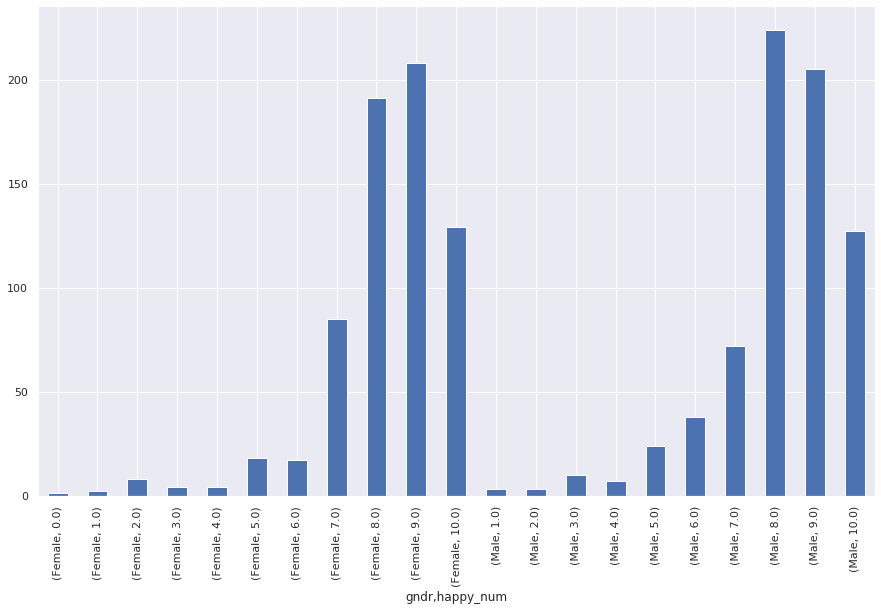

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,9)})

grouped_df['happy_num'].value_counts(sort = False).plot.bar()

Ovenstående plot er ikke så kønt. Fx kunne det give mening at farvelægge efter værdierne i `happy_num`. Det kan gøres ved at bruge metoden `unstack()` og så danne plottet:

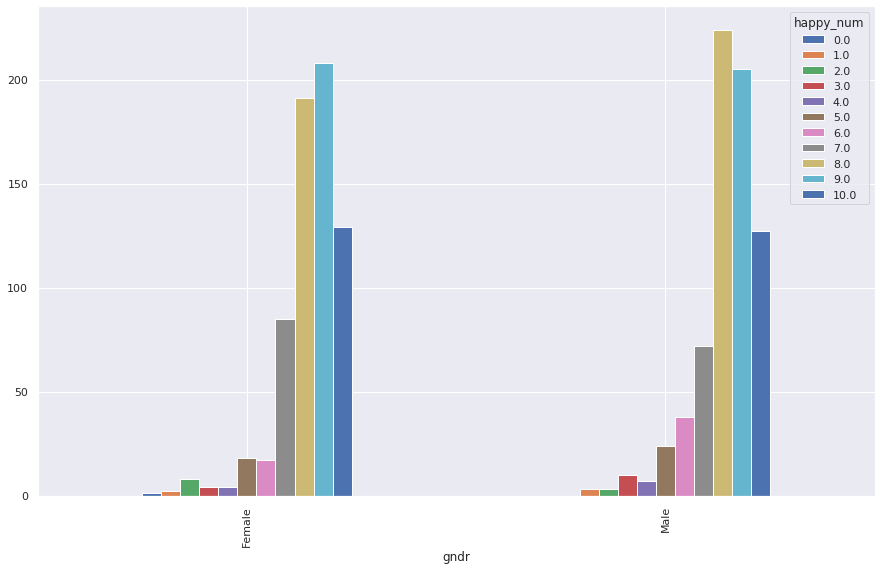

In [92]:
grouped_df['happy_num'].value_counts(sort = False).unstack(['happy_num']).plot.bar()

## Sidenote: Hvad gør `unstack`?

`unstack()` er en metode, der bruges til såkaldt "wide"-konvertering.

Hvis vi først ser på `value_counts()`, gives tællinger i long format; altså hvor hver række er en optælling, og optællingerne differentieres med en kolonne ( `happy_num`).

In [93]:
grouped_df['happy_num'].value_counts(sort = False)

gndr    happy_num
Female  0.0            1
        1.0            2
        2.0            8
        3.0            4
        4.0            4
        5.0           18
        6.0           17
        7.0           85
        8.0          191
        9.0          208
        10.0         129
Male    1.0            3
        2.0            3
        3.0           10
        4.0            7
        5.0           24
        6.0           38
        7.0           72
        8.0          224
        9.0          205
        10.0         127
Name: happy_num, dtype: int64

`unstack()` tager værdierne fra `happy_ num` og laver dem til kolonner. På den måde dannes der kun én række per gruppe, hvor værdier adskilles i kolonnerne (wide-format):

In [94]:
grouped_df['happy_num'].value_counts(sort = False).unstack(['happy_num'])

happy_num,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
gndr,,,,,,,,,,,
Female,1.0,2.0,8.0,4.0,4.0,18.0,17.0,85.0,191.0,208.0,129.0
Male,NaN,3.0,3.0,10.0,7.0,24.0,38.0,72.0,224.0,205.0,127.0


Når sådan en tabel plottes med `.plot.bar()` farvelægges der efter kolonneværdierne automatisk.

## Sidenote: Tilføj til plottet

Vi har nu dannet et meget fint plot, men vi kan gøre mere! 

Fx kunne det være rart at re-introducere de korrekte værdi-labels til plottet. Dette kan gøres med `plt.legend()`.

Derudover kan vi ændre aksetitlerne til at være mere sigende med `xlabel()`/`ylabel()`.

Til sidst kan vi tilføje en sigende titel med `plt.title()`.

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, "Count distribution of 'happy' across gender")

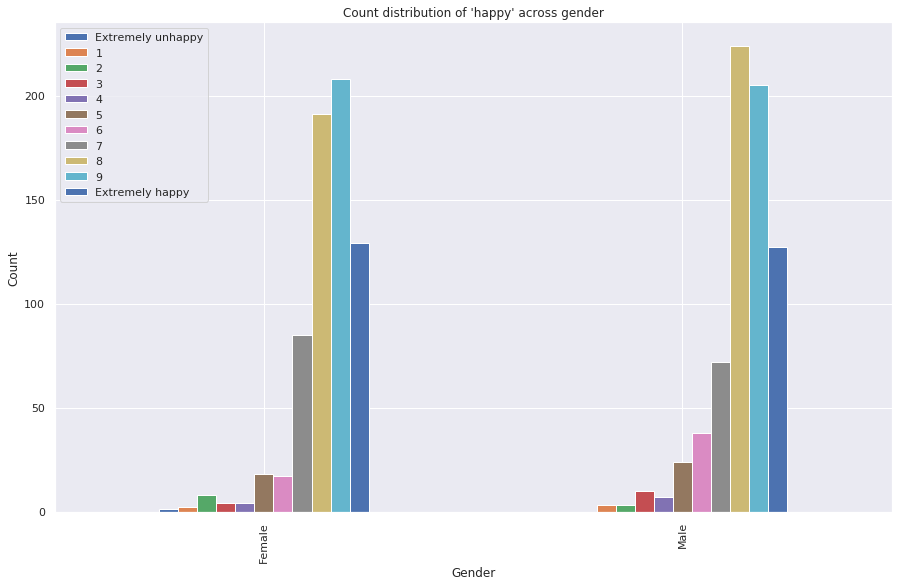

In [95]:
happy_legend = ["Extremely unhappy"] + list(map(str, range(1,10))) + ["Extremely happy"]

grouped_df['happy_num'].value_counts(sort = False).unstack(['happy_num']).plot.bar()
plt.legend(happy_legend)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count distribution of 'happy' across gender")

# ØVELSE: Visualiser grupperinger

Dan en visualisering, der viser fordelingen af svar af 'ppltrst' for hvert køn.

Det er valgfrit, om I koder 'ppltrst' om sådan, at den vises i rigtig rækkefølge.

# Gruppering efter flere værdier

`groupby()` kan grupperer efter lige så mange variable, som man har lyst til, blot ved at specificere flere variable. Herunder grupperes efter `gndr` og `health`. Først konverteres `health` dog til at være kategorisk:

In [96]:
from pandas.api.types import CategoricalDtype

health_cat = CategoricalDtype(categories = ['Very bad', 'Bad', 'Fair', 'Good', 'Very good'], ordered = True)
df['health'] = df['health'].astype(health_cat)

grouped_df = df.groupby(['gndr', 'health'])

Igen kan forskellige deskriptive mål dannes. Ved at bruge `size()`, får vi et output svarende til en krydstabel for de to variable:

In [97]:
grouped_df.size()

gndr    health   
Female  Very bad      11
        Bad           21
        Fair         148
        Good         248
        Very good    244
Male    Very bad       6
        Bad           35
        Fair         119
        Good         253
        Very good    306
dtype: int64

Bemærk at ovenstående output svarer til at gruppere efter `gndr` og bruge `value_counts()` på `health`. Igen kan vi derfor plotte denne optælling med `plot.bar()` og bruge `unstack()` til at farvelægge værdierne:

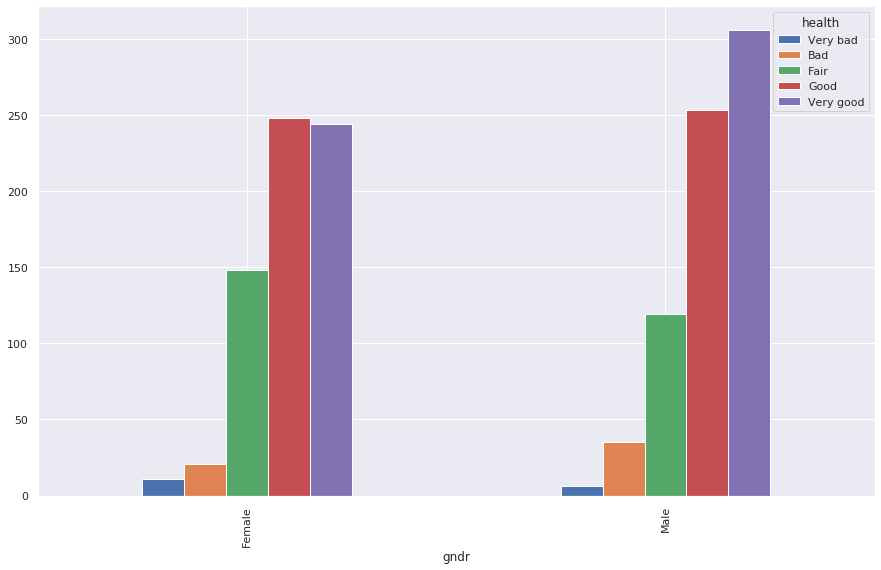

In [98]:
grouped_df.size().unstack('health').plot.bar()

Da data er grupperet efter både `gndr` og `health`, kan vi også danne mål ud fra andre variable; fx middelvægten inden for hver gruppe:

In [99]:
grouped_df['weight'].mean()

gndr    health   
Female  Very bad     64.936364
        Bad          67.368421
        Fair         71.338806
        Good         68.365254
        Very good    67.439035
Male    Very bad     73.400000
        Bad          82.176471
        Fair         85.466667
        Good         82.878862
        Very good    80.781293
Name: weight, dtype: float64

Det er igen den samme type output, så også dette kan vi plotte:

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Mean weight')

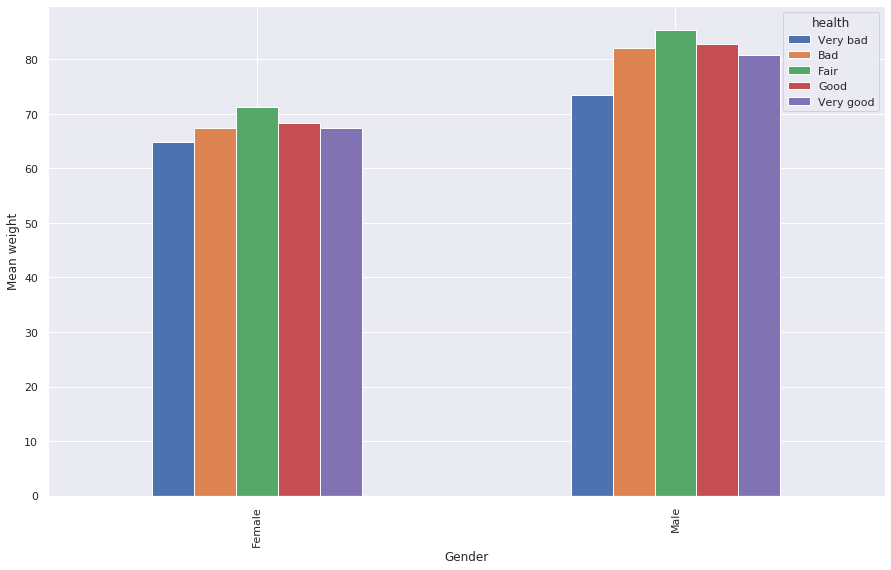

In [100]:
grouped_df['weight'].mean().unstack('health').plot.bar()
plt.xlabel("Gender")
plt.ylabel("Mean weight")

## Sidenote: Grupperinger med `seaborn` funktioner

Mange `seaborn` funktioner indeholder funktionalitet til at kunne foretage grupperinger i et plot. 

`sns.catplot()` er en "overfunktion" til at danne forskellige typer af kategoriske plots. Typen specificeres med argumentet `kind = `. `kind = "count"` giver et barplot, der tæller antal inden for hver kategori:

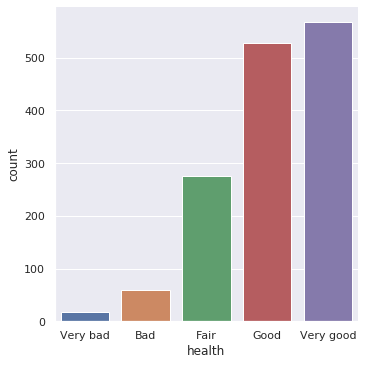

In [101]:
sns.catplot(data = df, kind = "count", x = "health")

Plottes kan "splittes ud" ved at bruge argumenter som `hue = ` og `col = `.

- `hue`: splitter værdier op i søjler for hver variabel givet i hue
- `col`: danner graf for hver værdi i col

Herunder dannes en fødselsårskategori med `pd.cut()`, som derefter bruges til at splitte visualiseringen ud i flere grafer (et "facet grid"):

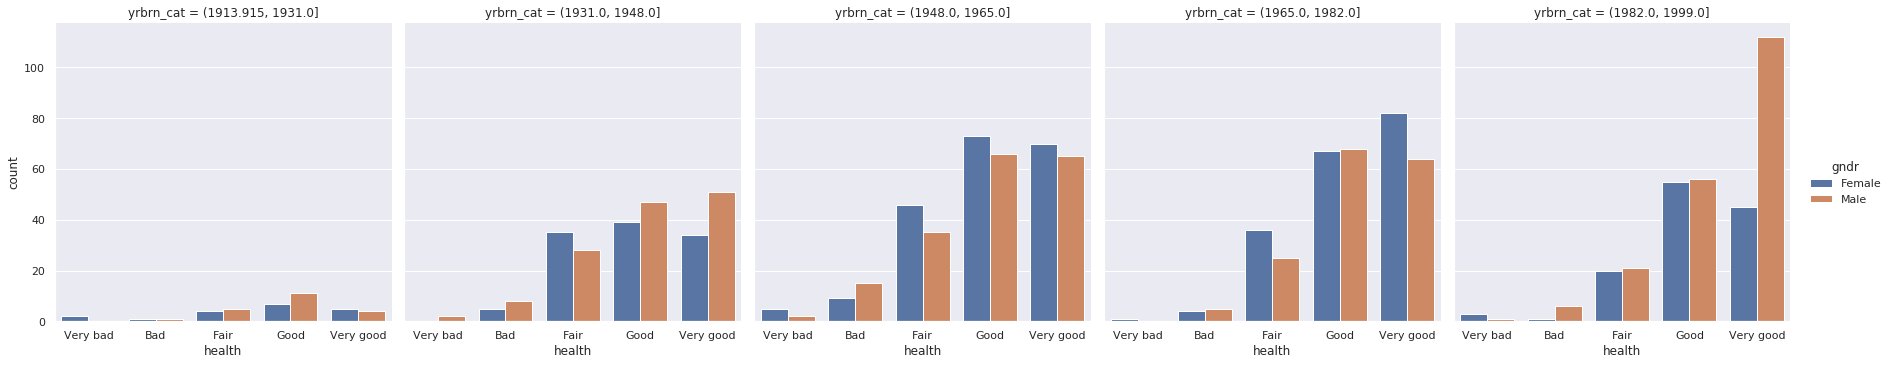

In [102]:
df['yrbrn_cat'] = pd.cut(df['yrbrn'], 5)

sns.catplot(data = df, kind = "count", x = "health", hue = "gndr", col = "yrbrn_cat")

# ØVELSE: Flere grupperinger

1. Dan en kategorisk variabel, der inddeler respondeter i 3 lige store grupper efter højde (brug `pd.cut()`)

2. Dan en visualisering, der viser fordeling af svar i `alcfreq` splittet ud på køn og højdekategori (brug enten seaborn eller `.plot` på grupperet data (`.groupby()`)

# Kan det blive vildere?

Som sagt kan man gruppere efter flere variable. Ved at kombinere viden fra de tidligere eksempler, kan vi producere et plot, der viser fordelingen i selvvurderet helbred summeret til 100% for grupperinger i køn og alder.

Følgende gøres:

- For at udregne procenter, skal vi bruge gruppestørrelserne for 'gndr' og 'yrbrn_cat' uden missing. `grouped_sizes` dannes, som først fjerner missing, hvis der er missing i de tre variable, som skal bruges. Derefter grupperes efter 'gndr' og 'yrbrn_cat' og til sidst tælles gruppestørrelserne med `.size()`.
- Dernæst dannes gruppering med den trejde variabel 'health': Vi har nu tællinger for selvvurderet helbred per årskategori per køn
- De to objekter divideres med hinanden: Antal i selvvurderet helbredskategori inden for gruppen divideret gruppens størrelse. 'health' unstackes.
- Til sidst dannes grafen med `stacked = True` for at få et stablet barplot

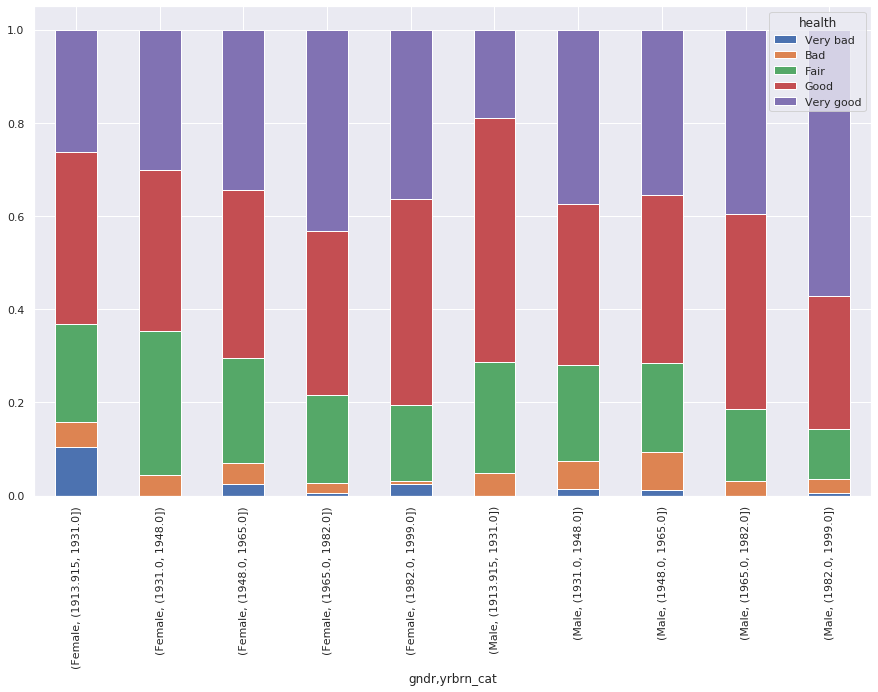

In [103]:
grouped_sizes = df.dropna(subset = ['gndr', 'yrbrn_cat', 'health']).groupby(['gndr', 'yrbrn_cat']).size()
grouped_df = df.groupby(['gndr', 'yrbrn_cat', 'health'])

grouped_health_pct = (grouped_df.size() / grouped_sizes).unstack('health')

grouped_health_pct.plot.bar(stacked = True)

# Men kan det blive... VILDERE!?

Krydstabulering er en relativt ufarlig "leg" vi kan lege med kategorisk data når vi gerne vil have et overblik over, hvad der foregår mellem 2 variable. Heldigvis er standardformatet for krydstabulering simpelthen enormt let i Pandas. Man behøver ikke specificere andet end dataframe og de to variable man vil vide noget om:

In [104]:
pd.crosstab(df.health, df.yrbrn_cat)

yrbrn_cat,"(1913.915, 1931.0]","(1931.0, 1948.0]","(1948.0, 1965.0]","(1965.0, 1982.0]","(1982.0, 1999.0]"
health,,,,,
Very bad,2,2,7,2,4
Bad,4,14,24,10,7
Fair,9,65,84,61,44
Good,20,91,143,141,120
Very good,9,85,146,150,160


Vi kunne også få den ide, at vi måske skulle tilføje nogle totaler:

In [105]:
pd.crosstab(df.health, df.yrbrn_cat, margins=True, margins_name="Total")

yrbrn_cat,"(1913.915, 1931.0]","(1931.0, 1948.0]","(1948.0, 1965.0]","(1965.0, 1982.0]","(1982.0, 1999.0]",Total
health,,,,,,
Very bad,2,2,7,2,4,17
Bad,4,14,24,10,7,59
Fair,9,65,84,61,44,263
Good,20,91,143,141,120,515
Very good,9,85,146,150,160,550
Total,44,257,404,364,335,1404


Eller måske skulle vi proppe nogle procenter på?

In [106]:
pd.crosstab(df.health, df.yrbrn_cat, normalize='columns') # Til kolonneprocenter
pd.crosstab(df.health, df.yrbrn_cat, normalize='index') # Til rækkeprocenter

yrbrn_cat,"(1913.915, 1931.0]","(1931.0, 1948.0]","(1948.0, 1965.0]","(1965.0, 1982.0]","(1982.0, 1999.0]"
health,,,,,
Very bad,0.045455,0.007782,0.017327,0.005495,0.011940
Bad,0.090909,0.054475,0.059406,0.027473,0.020896
Fair,0.204545,0.252918,0.207921,0.167582,0.131343
Good,0.454545,0.354086,0.353960,0.387363,0.358209
Very good,0.204545,0.330739,0.361386,0.412088,0.477612


yrbrn_cat,"(1913.915, 1931.0]","(1931.0, 1948.0]","(1948.0, 1965.0]","(1965.0, 1982.0]","(1982.0, 1999.0]"
health,,,,,
Very bad,0.117647,0.117647,0.411765,0.117647,0.235294
Bad,0.067797,0.237288,0.406780,0.169492,0.118644
Fair,0.034221,0.247148,0.319392,0.231939,0.167300
Good,0.038835,0.176699,0.277670,0.273786,0.233010
Very good,0.016364,0.154545,0.265455,0.272727,0.290909


Vi kan også presse citronen lidt og gøre det endnu mere fedt (eller forvirrende, alt afhængig af hvem man er) ved at tilføje endnu mere data:

In [110]:
pd.crosstab(df.yrbrn_cat, [df.health, df.gndr])

health             Very bad         Bad        Fair        Good       \
gndr                 Female Male Female Male Female Male Female Male   
yrbrn_cat                                                              
(1913.915, 1931.0]        2    0      1    1      4    5      7   11   
(1931.0, 1948.0]          0    2      5    8     35   28     39   47   
(1948.0, 1965.0]          5    2      9   15     46   35     73   66   
(1965.0, 1982.0]          1    0      4    5     36   25     67   68   
(1982.0, 1999.0]          3    1      1    6     20   21     55   56   

health             Very good       
gndr                  Female Male  
yrbrn_cat                          
(1913.915, 1931.0]         5    4  
(1931.0, 1948.0]          34   51  
(1948.0, 1965.0]          70   65  
(1965.0, 1982.0]          82   64  
(1982.0, 1999.0]          45  112

Problemet med at "presse citronen" er at tabeller ret hurtigt kan blive alt for vilde og uoverskuelige. Vi ender med en situation hvor vi ikke helt forstår hvor "magien" sker. Heldigvis kan Seaborn hjælpe os med en visualisering! Bemærk dog, at lige præcis DEN her version laver pjatrøv i top og bund. Matplotlib version 3.1.1 har ligesom..... smadret heatmaps en lille smule, så den irriterende halvering af øverste og nederste række holder op hvis vi bruger matplotlib 3.1.0 eller 3.1.2.

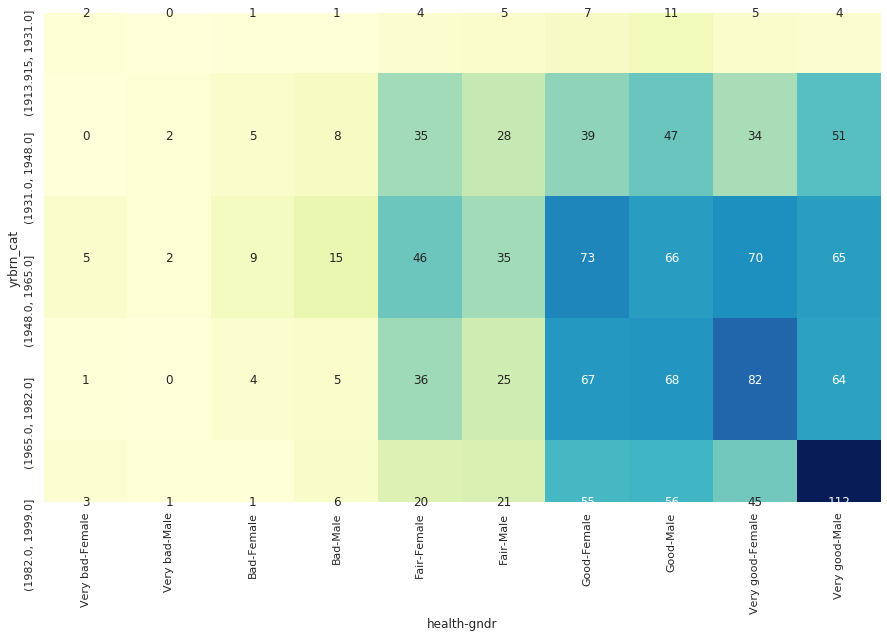

In [126]:
sns.heatmap(pd.crosstab(df.yrbrn_cat, [df.health, df.gndr]), cmap="YlGnBu", annot=True, cbar=False, fmt="d")

Måske er vi lidt for glade for ren visualisering og gider ikke de der irriterende tal? Look no further!

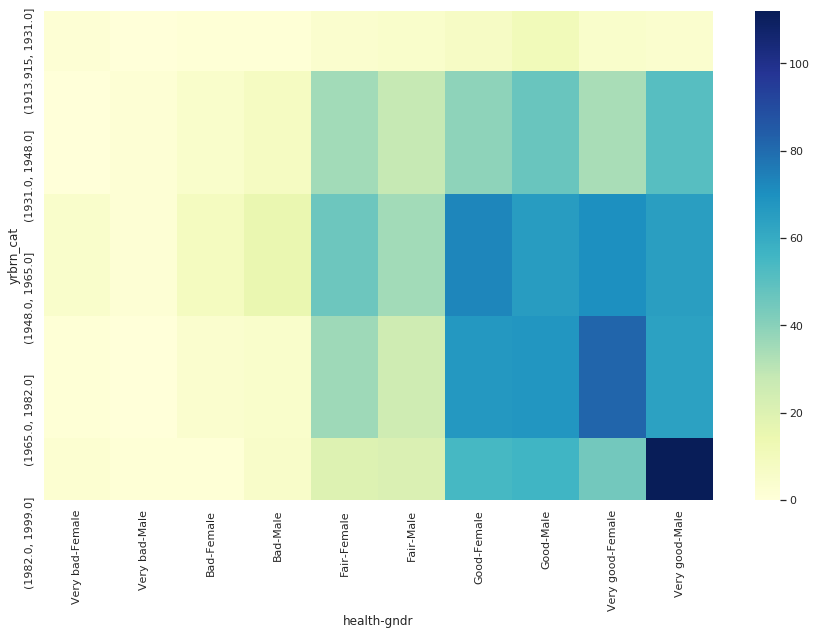

In [127]:
sns.heatmap(pd.crosstab(df.yrbrn_cat, [df.health, df.gndr]), cmap="YlGnBu", annot=False, cbar=True)